# Santander Kaggle Competition

## Summary

We're going to learn data science by participating in a machine learning competition. We'll go through how we initially approach a problem, what new things we can try, and finally make some submissions.

### Competition Description

From frontline support teams to C-suites, customer satisfaction is a key measure of success. Unhappy customers don't stick around. What's more, unhappy customers rarely voice their dissatisfaction before leaving.

Santander Bank is asking Kagglers to help them identify dissatisfied customers early in their relationship. Doing so would allow Santander to take proactive steps to improve a customer's happiness before it's too late.

In this competition, you'll work with hundreds of anonymized features to predict if a customer is satisfied or dissatisfied with their banking experience.

### Get the Data
1. Sign up for Kaggle
2. Download the data https://www.kaggle.com/c/santander-customer-satisfaction/data
3. Open the files and place the 'train' and 'test' csv files in the same folder as this notebook.



### Get our libraries

In [417]:
%matplotlib inline
# inline is an option to make our plots appear inline (instead of pop out)

import matplotlib
import matplotlib.pyplot as plt  # our standard plotting library; see 'seaborn' as alternative
import numpy as np  # fast arrays made for scientific computing, needed for sklearn
import scipy  # scientific computing tools, needed for sklearn
import pandas as pd  # great for data manipulation, looking at data
import sklearn  # aka sci-kit learn; python machine learning, built on top of numpy, scipy

In [418]:
# Set some display options so we can see everything (since this dataset isn't too large) 
pd.options.display.max_seq_items = 500
pd.options.display.max_columns = 350
pd.options.display.precision = 3

### Glimpse at our data

We want to load our data into a pandas dataframe. You're probably familiar with one-dimensional data like lists/arrays where it's a row of data. A dataframe is two-dimensional in that there's both rows and columns; this is what an Excel sheet looks like

In [419]:
# Let's load our data
DATA_LOCATION = '/Users/williamliu/Desktop/Santander/'
df_train = pd.read_csv(DATA_LOCATION + 'train.csv')
df_test = pd.read_csv(DATA_LOCATION + 'test.csv')

In [420]:
df_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,...,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10cte_ult1,ind_var9_cte_ult1,ind_var9_ult1,ind_var43_emit_ult1,ind_var43_recib_ult1,var21,num_var2_0_ult1,num_var2_ult1,num_aport_var13_hace3,num_aport_var13_ult1,num_aport_var17_hace3,num_aport_var17_ult1,num_aport_var33_hace3,num_aport_var33_ult1,num_var7_

In [421]:
np.unique(df_train.dtypes)  # Interesting, we only have numbers (int, float) and no categories (e.g. no text, categoricals)

array([dtype('int64'), dtype('float64')], dtype=object)

In [422]:
df_train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,...,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10cte_ult1,ind_var9_cte_ult1,ind_var9_ult1,ind_var43_emit_ult1,ind_var43_recib_ult1,var21,num_var2_0_ult1,num_var2_ult1,num_aport_var13_hace3,num_aport_var13_ult1,num_aport_var17_hace3,num_aport_var17_ult1,num_aport_var33_hace3,num_aport_var33_ult1,num_var7_

So this summary tells us quite a bit about the numerical part of the data. Let's break it down:

* We're training our dataset to __TARGET__, which can be 0 or 1. When we look at this column, we see that the 25%, 50%, and 75% are all 0's. This means that our dataset is imbalanced (with a bit more people being 0's than 1's.
* We take that above idea of imbalanced data and look at the rest of our variables (e.g. __imp_ent_var16_ult1__). Most of the data is 0's, but then we get a max value of 210,000.
* I think we'll need to clean the data. For example, column __var3__ has a min of -999999 and a max of 238. My guess is that -999999 stands for a state instead of there being many unique values from -999999 to 0.
* Yeah, we'll need to do some data cleaning; some numeric variables (e.g. __ind_var27_0__, __ind_var_28_0__) are just 0 for min and max. We can drop these since they're not telling us anything. We can look at the standard deviation and if it's 0, then we can get rid of because there's no change (e.g. min=70 with max=70 tells us no useful info)
* It looks like some columns are duplicates. Without even needing to sort, we can see that some columns are duplicates (e.g. __num_var13_medio_0__, __num_var13_medio__ and __ind_var34_0__, __ind_var_34__) where they have have the exact same min, max, standard deviation, mean. This will cause multicollinearity, a fancy way of saying don't have a variable that can linearly predict another variable (e.g. I'm alive and I'm dead, we don't need both since one will tell us the other).

TLDR, we need to:

* [ X ] Drop values that are not telling us anything (i.e. standard deviation of 0)
* [ X ] Drop duplicate columns
* [   ] Possibly clean data (e.g. -999,999) - TODO
* [ ] Compensate for unbalanced dataset (lot more TARGET of 0's than 1's) - Use Algorithms for this part or come up with a custom way of sampling


### Data Cleaning


In [423]:
# Data Cleaning - Drop values that are not telling us anything (i.e. standard deviation of 1)
print "Before Data Cleaning, data shape is: ", df_train.shape

for col in df_train:
    if df_train[col].std()==0:
        print "Dropping: ", col
        del df_train[col]

Before Data Cleaning, data shape is:  (76020, 371)
Dropping:  ind_var2_0
Dropping:  ind_var2
Dropping:  ind_var27_0
Dropping:  ind_var28_0
Dropping:  ind_var28
Dropping:  ind_var27
Dropping:  ind_var41
Dropping:  ind_var46_0
Dropping:  ind_var46
Dropping:  num_var27_0
Dropping:  num_var28_0
Dropping:  num_var28
Dropping:  num_var27
Dropping:  num_var41
Dropping:  num_var46_0
Dropping:  num_var46
Dropping:  saldo_var28
Dropping:  saldo_var27
Dropping:  saldo_var41
Dropping:  saldo_var46
Dropping:  imp_amort_var18_hace3
Dropping:  imp_amort_var34_hace3
Dropping:  imp_reemb_var13_hace3
Dropping:  imp_reemb_var33_hace3
Dropping:  imp_trasp_var17_out_hace3
Dropping:  imp_trasp_var33_out_hace3
Dropping:  num_var2_0_ult1
Dropping:  num_var2_ult1
Dropping:  num_reemb_var13_hace3
Dropping:  num_reemb_var33_hace3
Dropping:  num_trasp_var17_out_hace3
Dropping:  num_trasp_var33_out_hace3
Dropping:  saldo_var2_ult1
Dropping:  saldo_medio_var13_medio_hace3


In [424]:
print "After data cleaning, data shape is ", df_train.shape

After data cleaning, data shape is  (76020, 337)


In [425]:
# Data Cleaning - Look at duplicate columns
print df_train['num_var13_medio_0'].unique()
print df_train['num_var13_medio'].unique()
print df_train['num_var13_medio_0'].sum()
print df_train['num_var13_medio'].sum()

[0 3]
[0 3]
6
6


In [426]:
from pandas.core.common import array_equivalent

def duplicate_columns(frame):
    groups = frame.columns.to_series().groupby(frame.dtypes).groups
    dups = []

    for t, v in groups.items():

        cs = frame[v].columns
        vs = frame[v]
        lcs = len(cs)

        for i in range(lcs):
            ia = vs.iloc[:,i].values
            for j in range(i+1, lcs):
                ja = vs.iloc[:,j].values
                if array_equivalent(ia, ja):
                    dups.append(cs[i])
                    break

    return dups

In [427]:
# Data Cleaning - Drop duplicate columns
#df_train.T.drop_duplicates().T  # this takes a while
dupes = duplicate_columns(df_train)
df_train = df_train.drop(dupes, axis=1)

In [428]:
print df_train.shape

(76020, 308)


In [429]:
# Spot check and confirm the duplicate column is no longer there
print df_train['num_var13_medio'].unique()
print df_train['num_var13_medio'].sum()
#print df_train['num_var13_medio_0'].unique()  # Returns Key Error because column is no longer there
#print df_train['num_var13_medio_0'].sum()

[0 3]
6


### TODO: More data cleaning

In [430]:
#from collections import OrderedDict

#df_train_keys = []
#df_train_values = []
#df_train_unique = {}
#for col in df_train:
#     unique_count = len(df_train[col].unique())
#     df_train_unique[col] = unique_count


In [431]:
df_train.columns  # wow that's still a lot of features to choose from

Index([u'ID', u'var3', u'var15', u'imp_ent_var16_ult1',
       u'imp_op_var39_comer_ult1', u'imp_op_var39_comer_ult3',
       u'imp_op_var40_comer_ult1', u'imp_op_var40_comer_ult3',
       u'imp_op_var40_efect_ult1', u'imp_op_var40_efect_ult3',
       u'imp_op_var40_ult1', u'imp_op_var41_comer_ult1',
       u'imp_op_var41_comer_ult3', u'imp_op_var41_efect_ult1',
       u'imp_op_var41_efect_ult3', u'imp_op_var41_ult1',
       u'imp_op_var39_efect_ult1', u'imp_op_var39_efect_ult3',
       u'imp_op_var39_ult1', u'imp_sal_var16_ult1', u'ind_var1_0', u'ind_var1',
       u'ind_var5_0', u'ind_var5', u'ind_var8_0', u'ind_var8', u'ind_var12_0',
       u'ind_var12', u'ind_var13_0', u'ind_var13_corto_0', u'ind_var13_corto',
       u'ind_var13_largo_0', u'ind_var13_largo', u'ind_var13_medio',
       u'ind_var13', u'ind_var14_0', u'ind_var14', u'ind_var17_0',
       u'ind_var17', u'ind_var18', u'ind_var19', u'ind_var20_0', u'ind_var20',
       u'ind_var24_0', u'ind_var24', u'ind_var25_cte', u'ind_v

In [432]:
type(df_train)

pandas.core.frame.DataFrame

### Plotting

 2         74165
 8           138
-999999      116
 9           110
 3           108
dtype: int64

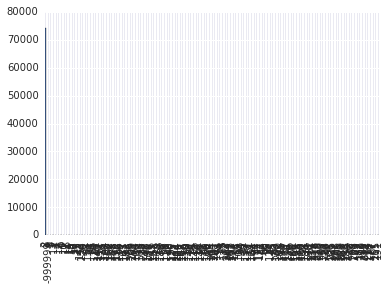

In [433]:
# I'm picking just one random feature and taking a look at it (not very scientific, just showing how to look at a feature)
df_train['var3'].value_counts().plot(kind='bar')
df_train['var3'].value_counts().head()

# Just by eyeballing it, something like this doesn't look like a good feature
# because most of the data has the value '2' (74165 out of the entire 76020)
# It could be that the other values have a high correlation to TARGET, but even if it is, it's a small number
# Our algorithm will probably not choose this as a feature to use
# Even though this is a number type, the -999999 is probably a category; this might mean something like 'Unknown'

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


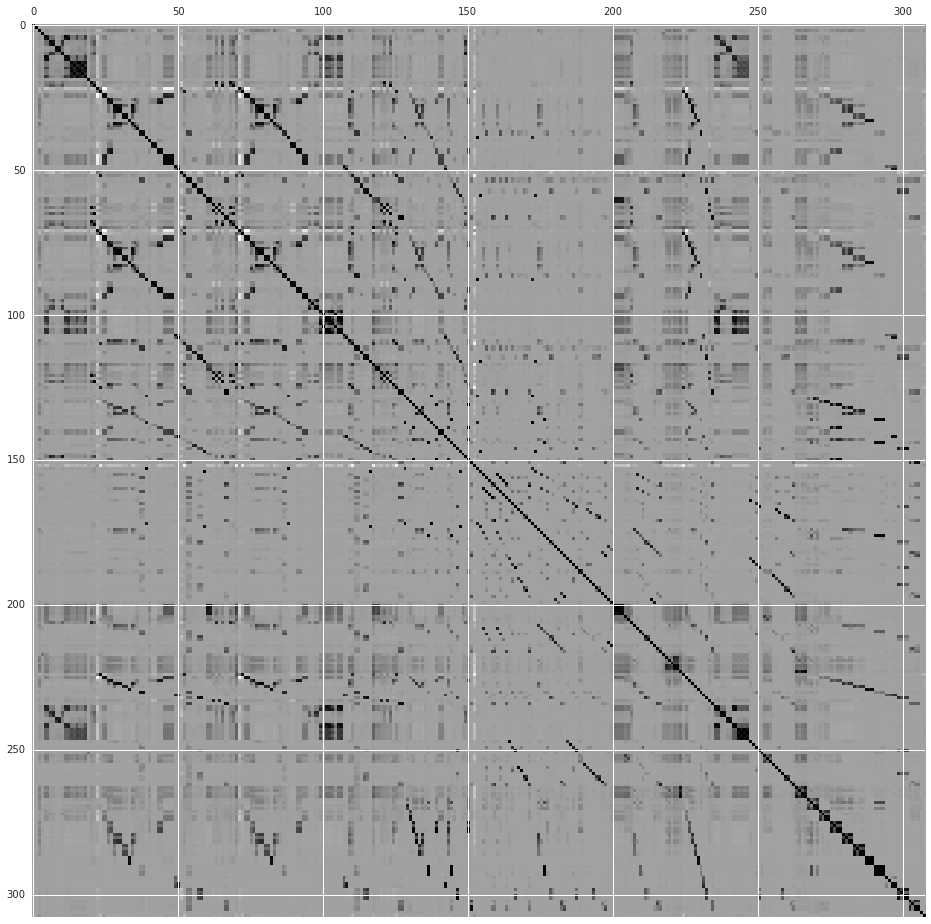

In [434]:
%pylab inline
# We should do a correlation matrix since we want to see how all of these features correlates to TARGET
plt.figure(figsize(18, 18))
plt.matshow(df_train.corr())  # Eww, this is a bit ugly since there's so many features

# We can split up the plots so we see only a few features at a time, but I think we should stick with tables initially

In [435]:
temp = df_train.corr(method='pearson').abs()  # 'pearson', 'kendall'
s = temp.unstack()
type(s)
s.TARGET.order()  # See the highest correlated values for TARGET

imp_ent_var16_ult1               1.75e-05
num_var37_med_ult2               2.93e-05
num_op_var40_ult3                1.19e-04
num_var7_recib_ult1              2.90e-04
saldo_medio_var17_ult3           3.28e-04
num_var32                        3.39e-04
imp_op_var40_comer_ult3          3.58e-04
ind_var32                        5.03e-04
imp_sal_var16_ult1               5.09e-04
saldo_medio_var17_ult1           5.83e-04
saldo_var32                      6.21e-04
saldo_var1                       6.95e-04
delta_imp_aport_var33_1y3        7.36e-04
delta_num_aport_var33_1y3        7.36e-04
imp_trasp_var33_out_ult1         7.36e-04
num_trasp_var33_out_ult1         7.36e-04
num_reemb_var33_ult1             7.36e-04
imp_reemb_var33_ult1             7.36e-04
saldo_medio_var29_hace3          7.36e-04
imp_reemb_var17_hace3            7.36e-04
num_reemb_var17_hace3            7.36e-04
delta_num_reemb_var33_1y3        7.36e-04
delta_num_trasp_var33_out_1y3    7.36e-04
saldo_var17                      7

In [538]:
s.TARGET.order().to_csv('target_order.csv')

### Feature Selection

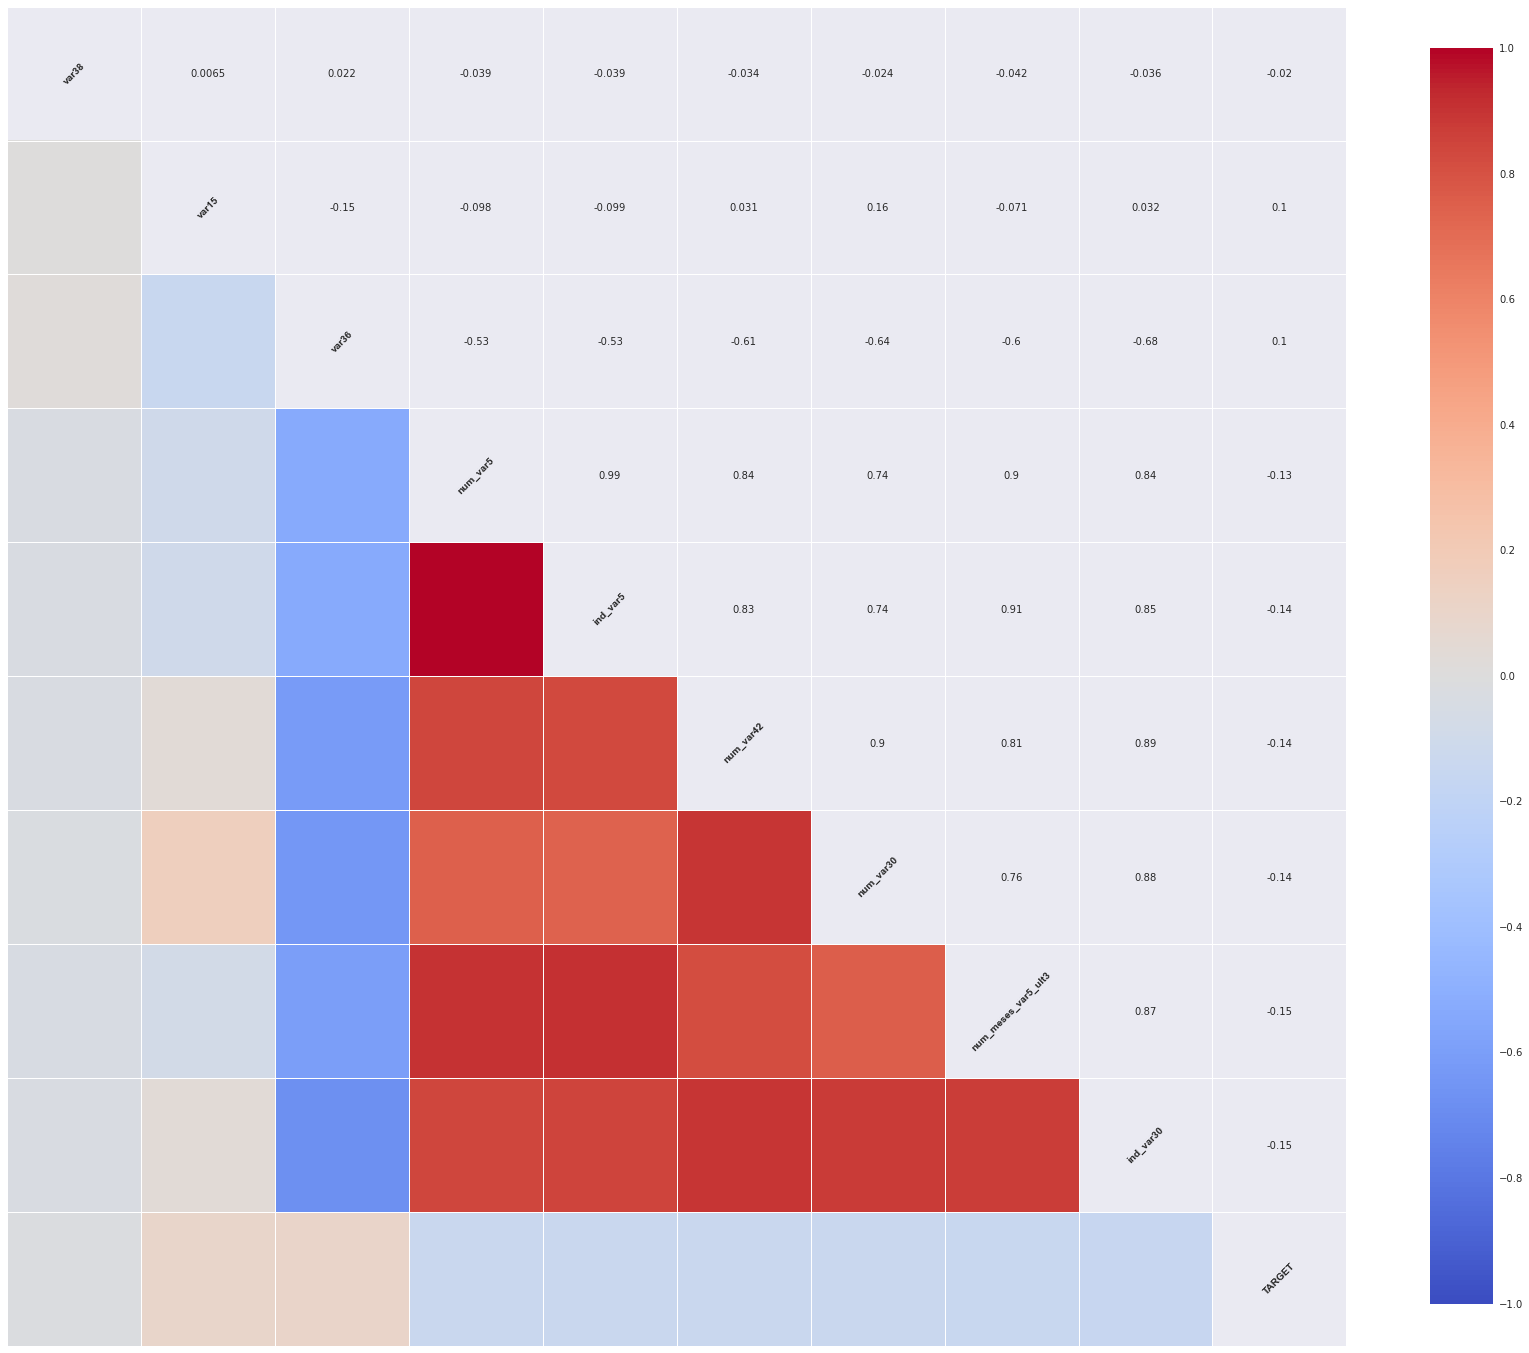

In [701]:
# Based on correlation, these might be a good place to try; these all look pretty close. Which one should we use?
#var15                            1.01e-01
#var36                            1.03e-01
#num_var5                         1.34e-01
#ind_var5                         1.35e-01
#num_var42                        1.36e-01
#num_var30                        1.38e-01
#num_meses_var5_ult3              1.48e-01
#ind_var30                        1.50e-01

# I'm not a big fan of matplotlib so will plot with seaborn
df_high_corr = df_train[['var38', 'var15', 'var36', 'num_var5', 'ind_var5', 'num_var42', 'num_var30', 'num_meses_var5_ult3', 'ind_var30', 'TARGET']]

import seaborn as sns  # if you don't see seaborn and you're using Anaconda, in terminal do: conda install seaborn
sns.set_context(rc={"figure.figsize": (30,30)})  # set size
sns.corrplot(df_high_corr, sig_stars=True, cbar=True, method='pearson')  # pearson, kendall, spearman

In [730]:
# Feature Selection
# I'll pick these features for now - later we can try a Random Forest to help determine what is the best features to use
# I'm also going off a hunch and getting rid of the vars that correlate too closely to each other so that I'm
# only keeping the highest one of the group (ind_var30)

#var15                            1.01e-01
#var36                            1.03e-01
#num_var5                         1.34e-01
#ind_var5                         1.35e-01
#num_var42                        1.36e-01
#num_var30                        1.38e-01
#num_meses_var5_ult3              1.48e-01
#ind_var30                        1.50e-01

#my_custom_features = ['var15', 'var36', 'ind_var30']
#my_custom_features = ['var15', 'var36', 'num_var5', 'ind_var5', 'num_var42', 'num_var30', 'num_meses_var5_ult3', 'ind_var30']
my_custom_features = s.TARGET.order()[235:307].index.tolist()
df_train_selected = df_train[my_custom_features]

In [731]:
df_train_selected.head()

,ind_var25,var38,num_op_var41_efect_ult3,imp_op_var40_efect_ult3,ind_var14_0,saldo_medio_var5_hace2,num_op_var39_efect_ult3,imp_aport_var13_hace3,saldo_medio_var12_ult1,num_op_var41_efect_ult1,ind_var43_recib_ult1,saldo_medio_var12_ult3,imp_op_var41_efect_ult3,saldo_var24,num_op_var39_efect_ult1,saldo_var12,imp_op_var39_efect_ult3,saldo_medio_var13_corto_hace2,ind_var25_cte,ind_var26_cte,saldo_var42,saldo_medio_var13_corto_ult3,num_var22_ult1,saldo_medio_var13_corto_ult1,num_var12_0,saldo_var13_corto,num_meses_var8_ult3,num_aport_var13_hace3,imp_op_var39_ult1,imp_op_var41_ult1,ind_var8,num_var8,num_var5_0,num_var39_0,imp_op_var41_efect_ult1,saldo_var13,num_var24_0,ind_var24_0,num_var41_0,imp_op_var39_efect_ult1,num_meses_var12_ult3,num_var24,ind_var24,ind_var5_0,num_var30_0,num_var12,ind_var41_0,num_var13_corto_0,ind_var12,ind_var13_corto_0,num_meses_var13_corto_ult3,num_var13_corto,ind_var13_corto,ind_var39_0,saldo_var30,num_var13_0,ind_var12_0,num_var13,ind_var13_0,ind_var13,num_var8_0,ind_var8_0,num_var35,num_var4,var15,var36,num_var5,ind_var5,num_var42,num_var30,num_meses_var5_ult3,ind_var30
0,0,39205.17,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,3,3,0,0,0,0,3,0,0,0,0,1,3,0,1,0,0,0,0,0,0,1,0.00,0,0,0,0,0,0,0,0,0,23,99,0,0,0,0,0,0
1,0,49278.03,0,0,0,0.00,0,300,0.00,0,0,0.00,0,0,0,0,0,300,0,0,0.00,240.75,0,300,0,300,0,3,0,0,0,0,3,3,0,300,0,0,3,0,0,0,0,1,6,0,1,3,0,1,3,3,1,1,300.00,3,0,3,1,1,0,0,3,1,34,3,0,0,0,3,1,1
2,0,67333.77,0,0,0,3.00,0,0,0.00,0,0,0.00,0,0,0,0,0,0,0,0,3.00,0.00,0,0,0,0,0,0,0,0,0,0,3,3,0,0,0,0,3,0,0,0,0,1,3,0,1,0,0,0,0,0,0,1,3.00,0,0,0,0,0,0,0,3,1,23,99,3,1,3,3,3,1
3,0,64007.97,0,0,0,186.09,0,0,0.00,0,0,0.00,0,0,0,0,0,0,0,0,70.62,0.00,0,0,0,0,0,0,195,195,0,0,3,3,0,0,0,0,3,0,0,0,0,1,3,0,1,0,0,0,0,0,0,1,70.62,0,0,0,0,0,0,0,9,3,37,2,3,1,3,3,2,1
4,0,117310.98,0,0,0,3.00,0,0,85501.89,0,1,85501.89,0,135003,0,135003,0,0,0,0,135003.00,0.00,6,0,3,0,0,0,0,0,0,0,3,3,0,0,3,1,3,0,1,3,1,1,6,3,1,0,1,0,0,0,0,1,135003.00,0,1,0,0,0,0,0,3,1,39,1,0,0,3,3,3,1


* So based on correlation, we have a starting place on what features to select; we're being careful with the
  features that correlate highly with each other (e.g. num_var5, ind_var5, num_var42, num_var30, num_meses_var5_ult4, ind_var30) so for now we'll only pick the highest correlation feature out of that group.
* TODO: We can also try a Decision Tree like Random Forest to help us pick out what features to use

## Split the Data

I mentioned that we should only glimpse at our data because we don't want to cheat and come up with an algorithm that will overfit. So before we use any algorithms, we want to split our data into train and test with __X__ being the features we might want and __y__ being the target.

Note: I understand that we've been given a separate test dataset, but we're 'saving' that dataset until we're pretty confident of our algorithms and we'll use the test set to determine which final algorithms to submit. 

In [732]:
#X = df_train.drop(['TARGET'], axis=1)  # If we want to use all the data except TARGET
X = df_train_selected
y = df_train.TARGET  # We only want the target

In [733]:
X.info()
X.head()  # Let's double check the column TARGET is no longer there

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76020 entries, 0 to 76019
Data columns (total 72 columns):
ind_var25                        76020 non-null int64
var38                            76020 non-null float64
num_op_var41_efect_ult3          76020 non-null int64
imp_op_var40_efect_ult3          76020 non-null float64
ind_var14_0                      76020 non-null int64
saldo_medio_var5_hace2           76020 non-null float64
num_op_var39_efect_ult3          76020 non-null int64
imp_aport_var13_hace3            76020 non-null float64
saldo_medio_var12_ult1           76020 non-null float64
num_op_var41_efect_ult1          76020 non-null int64
ind_var43_recib_ult1             76020 non-null int64
saldo_medio_var12_ult3           76020 non-null float64
imp_op_var41_efect_ult3          76020 non-null float64
saldo_var24                      76020 non-null float64
num_op_var39_efect_ult1          76020 non-null int64
saldo_var12                      76020 non-null float64
imp_op_va

,ind_var25,var38,num_op_var41_efect_ult3,imp_op_var40_efect_ult3,ind_var14_0,saldo_medio_var5_hace2,num_op_var39_efect_ult3,imp_aport_var13_hace3,saldo_medio_var12_ult1,num_op_var41_efect_ult1,ind_var43_recib_ult1,saldo_medio_var12_ult3,imp_op_var41_efect_ult3,saldo_var24,num_op_var39_efect_ult1,saldo_var12,imp_op_var39_efect_ult3,saldo_medio_var13_corto_hace2,ind_var25_cte,ind_var26_cte,saldo_var42,saldo_medio_var13_corto_ult3,num_var22_ult1,saldo_medio_var13_corto_ult1,num_var12_0,saldo_var13_corto,num_meses_var8_ult3,num_aport_var13_hace3,imp_op_var39_ult1,imp_op_var41_ult1,ind_var8,num_var8,num_var5_0,num_var39_0,imp_op_var41_efect_ult1,saldo_var13,num_var24_0,ind_var24_0,num_var41_0,imp_op_var39_efect_ult1,num_meses_var12_ult3,num_var24,ind_var24,ind_var5_0,num_var30_0,num_var12,ind_var41_0,num_var13_corto_0,ind_var12,ind_var13_corto_0,num_meses_var13_corto_ult3,num_var13_corto,ind_var13_corto,ind_var39_0,saldo_var30,num_var13_0,ind_var12_0,num_var13,ind_var13_0,ind_var13,num_var8_0,ind_var8_0,num_var35,num_var4,var15,var36,num_var5,ind_var5,num_var42,num_var30,num_meses_var5_ult3,ind_var30
0,0,39205.17,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,3,3,0,0,0,0,3,0,0,0,0,1,3,0,1,0,0,0,0,0,0,1,0.00,0,0,0,0,0,0,0,0,0,23,99,0,0,0,0,0,0
1,0,49278.03,0,0,0,0.00,0,300,0.00,0,0,0.00,0,0,0,0,0,300,0,0,0.00,240.75,0,300,0,300,0,3,0,0,0,0,3,3,0,300,0,0,3,0,0,0,0,1,6,0,1,3,0,1,3,3,1,1,300.00,3,0,3,1,1,0,0,3,1,34,3,0,0,0,3,1,1
2,0,67333.77,0,0,0,3.00,0,0,0.00,0,0,0.00,0,0,0,0,0,0,0,0,3.00,0.00,0,0,0,0,0,0,0,0,0,0,3,3,0,0,0,0,3,0,0,0,0,1,3,0,1,0,0,0,0,0,0,1,3.00,0,0,0,0,0,0,0,3,1,23,99,3,1,3,3,3,1
3,0,64007.97,0,0,0,186.09,0,0,0.00,0,0,0.00,0,0,0,0,0,0,0,0,70.62,0.00,0,0,0,0,0,0,195,195,0,0,3,3,0,0,0,0,3,0,0,0,0,1,3,0,1,0,0,0,0,0,0,1,70.62,0,0,0,0,0,0,0,9,3,37,2,3,1,3,3,2,1
4,0,117310.98,0,0,0,3.00,0,0,85501.89,0,1,85501.89,0,135003,0,135003,0,0,0,0,135003.00,0.00,6,0,3,0,0,0,0,0,0,0,3,3,0,0,3,1,3,0,1,3,1,1,6,3,1,0,1,0,0,0,0,1,135003.00,0,1,0,0,0,0,0,3,1,39,1,0,0,3,3,3,1


In [734]:
y.head()  # let's double check the column TARGET is the only data there

0    0
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

### Variations to splitting the data and validating

There's a few ways we can split and validate our data. First, we can do a simple __train and test split__ (default .75 to .25); the advantage with this method is that it's quick and easy, but the issue is we don't use all the training data. Another method is to do __K-Fold__ where you split your data K times, then do validation and average up the scores; the advantage with this method is you use more data, but this takes more computing time. Depending on how balanced your dataset, you might also want to consider __StratifiedKFold__. For now we skip this part, but will come back to it later.

In [735]:
#X = df_train_selected
X = df_train_selected

In [736]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .75)  # train_size = 1 to use everything
X_train.shape, X_test.shape

((57015, 72), (19005, 72))

## Algorithm Approach

We have a classification problem that is trying to predict TARGET (as a probability from 0 through 1).

With an imbalanced dataset (lot less TARGET of 1 than 0), we should try doing the following to compensate for it:

* Random oversampling (add instances) to the underrepresented TARGET type (1)
* Random undersampling (remove instances) from the overrepresented TARGET type (0)
* change our algorithm to overweight the underrepresented TARGET type (1)
* Definitely use AUC (Area Under the ROC Curve) to get the real performance (or else you'll get misleading results)
* We should think about algorithms like AdaBoost, Decision Trees, or some type of ensemble 

In [760]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

#clf = AdaBoostClassifier(n_estimators=16, learning_rate=.74)
#clf = RandomForestClassifier(n_estimators=30)
clf = xgb.XGBClassifier(
                missing=9999999999,
                max_depth = 5,
                n_estimators=350,
                learning_rate=0.03, 
                nthread=4,
                subsample=0.95,
                colsample_bytree=0.85,
                seed=4242)

In [761]:
clf.fit(X_train, y_train)  # Fit Classifier

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.85,
       gamma=0, learning_rate=0.03, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=9999999999, n_estimators=350, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=4242, silent=True, subsample=0.95)

In [762]:
y_predict = clf.predict_proba(X_test)[:,1]
print X_test.shape  # This is the dataset we learned from
print y_test.shape  # This is what the real values are
print y_predict.shape  # This is what we predicted

(19005, 72)
(19005,)
(19005,)


In [763]:
from sklearn.metrics import roc_auc_score
print "AUC Score is: ", roc_auc_score(y_test, y_predict)

AUC Score is:  0.839048219424


In [765]:
#clf = AdaBoostClassifier(n_estimators=50)
#75 / 25
#AUC Score is:  0.782209656895

#clf = AdaBoostClassifier(n_estimators=50, learning_rate=0.60)
#AUC Score is:  0.783869013936

#clf = AdaBoostClassifier(n_estimators=16)
#AUC Score is:  0.790016223431

#clf = AdaBoostClassifier(n_estimators=16, learning_rate=.74)
#AUC Score is:  0.792891245445

#clf = AdaBoostClassifier(n_estimators=16, learning_rate=.74)
#AUC Score is:  0.80074250141

# clf = xgb.XGBClassifier(
#                 missing=9999999999,
#                 max_depth = 4,
#                 n_estimators=5000,
#                 learning_rate=0.001, 
#                 nthread=4,
#                 subsample=0.75,
#                 colsample_bytree=0.75)
#train_size = .90

# clf = xgb.XGBClassifier(
#                 missing=9999999999,
#                 max_depth = 6,
#                 n_estimators=350,
#                 learning_rate=0.03, 
#                 nthread=4,
#                 subsample=0.95,
#                 colsample_bytree=0.85,
#                 seed=4242)
#AUC Score is:  0.822221253343

# clf = xgb.XGBClassifier(
#                 missing=9999999999,
#                 max_depth = 6,
#                 n_estimators=350,
#                 learning_rate=0.03, 
#                 nthread=4,
#                 subsample=0.95,
#                 colsample_bytree=0.85,
#                 seed=4242)
# AUC Score is:  0.837656969463

# clf = xgb.XGBClassifier(
#                 missing=9999999999,
#                 max_depth = 5,
#                 n_estimators=350,
#                 learning_rate=0.03, 
#                 nthread=4,
#                 subsample=0.95,
#                 colsample_bytree=0.85,
#                 seed=4242)
#AUC Score is:  0.839048219424

## AUC Score

So why are we scoring using an AUC (Area Under Curve) Score? The idea is that since our model is predicting a binary result (say Pregnant or Not Pregnant, Happy or Not Happy), we get the percentage that we would guess correctly. Random guessing would score around .5 (meaning 50% right or wrong). The higher the AUC Score the better you are at predicting.

In [766]:
y_predict = np.array(y_predict)
y_test = np.array(y_test)
print type(y_predict)
print type(y_test)

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


In [767]:
y_predict  # Notice that our predictions are probabilities

array([ 0.00161683,  0.00416765,  0.00447763, ...,  0.00281634,
        0.02817703,  0.0061356 ], dtype=float32)

### Confusion Matrix

If we didn't predict the probability, we can predict a binary response. This can help us look at what our algorithm is doing wrong by looking at the results in a confusion matrix.

In [768]:
from sklearn.metrics import confusion_matrix
y_predict_binary = clf.predict(X_test)
print type(y_predict_binary)
print y_predict_binary
print len(y_predict_binary)

<type 'numpy.ndarray'>
[0 0 0 ..., 0 0 0]
19005


In [769]:
# Confusion Matrix looks like:

#                    Predicted
#                    Yes,  No
#  Actual   Yes  |   TP,   FN
#           No   |   FP,   TN

# TP = True Positive
# FN = False Negative
# FP = False Positive
# TN = True Negative

confusion_matrix(y_test, y_predict_binary)

# From these results, we can see that we predicted many True Positives 
# and False Positives, yet also no True Negative (huge red flag that we are doing
# something wrong!)

array([[18246,     6],
       [  752,     1]])

## Finished with the first analysis pass

So we finished our first pass of analyzing our data. We have a lot to do still. We can use a Pipeline to try a number of things including:

* sampling the data different ways and using more data
* selecting more features
* trying different classifiers
* trying different parameters in the classifiers

In [770]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn import cross_validation

X = df_train
y = df_train.TARGET  # We only want the target

In [771]:
cv = cross_validation.StratifiedKFold(y, n_folds=10)

# clf = Pipeline([
#         ('adaboost', AdaBoostClassifier()),
#     ])

In [772]:
len(y)

76020

### Applying Algorithm to test.csv Dataset

In [773]:
df_test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,...,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10cte_ult1,ind_var9_cte_ult1,ind_var9_ult1,ind_var43_emit_ult1,ind_var43_recib_ult1,var21,num_var2_0_ult1,num_var2_ult1,num_aport_var13_hace3,num_aport_var13_ult1,num_aport_var17_hace3,num_aport_var17_ult1,num_aport_var33_hace3,num_

In [774]:
df_test_selected = df_test[my_custom_features]

In [775]:
df_test_selected.shape

(75818, 72)

In [776]:
ids = df_test['ID']

In [777]:
#results = clf.predict_proba(df_test_selected)[:,1]
results = clf.predict_proba(df_test_selected)[:,1]

In [778]:
#results = results.tolist()
target = y_predict.tolist()

In [779]:
# Write to File
submit = pd.DataFrame({'ID': ids, 'TARGET': results})

In [780]:
submit.head()

,ID,TARGET
0,2,4.43e-02
1,5,4.99e-02
2,6,1.57e-03
3,7,8.46e-03
4,9,2.22e-03


In [781]:
submit.to_csv('submission.csv', index=False)